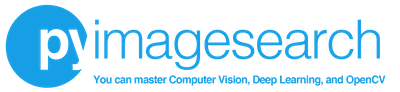

# Detect eyes, nose, lips, and jaw with dlib, OpenCV, and Python
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [Detect eyes, nose, lips, and jaw with dlib, OpenCV, and Python](http://pyimagesearch.com/2017/04/10/detect-eyes-nose-lips-jaw-dlib-opencv-python/) blog post published on 2017-04-10.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2020 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible joining PyImageSearch Plus at [http://pyimg.co/plus/](http://pyimg.co/plus) today.*

### Download the code zip file

In [ ]:
!wget https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/detect-face-parts/detect-face-parts.zip
!unzip -qq detect-face-parts.zip
%cd detect-face-parts

## Blog Post Code

### Import Packages

In [1]:
from imutils import face_utils
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import dlib
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [2]:
def plt_imshow(title, image):
	
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.figure(figsize=(12, 12))
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Extracting parts of the face using dlib, OpenCV, and Python

In [5]:
args = {
    "shape_predictor": "/content/sample_data/shape_predictor_68_face_landmarks.dat",
    "image": "/content/sample_data/self_001.jpg"
}

In [6]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

# load the input image, resize it, and convert it to grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

In [7]:
# initialize unique color for each facial landmark region
colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
    (168, 100, 168), (158, 163, 32),
    (163, 38, 32), (180, 42, 220),
    (100, 68, 109)]

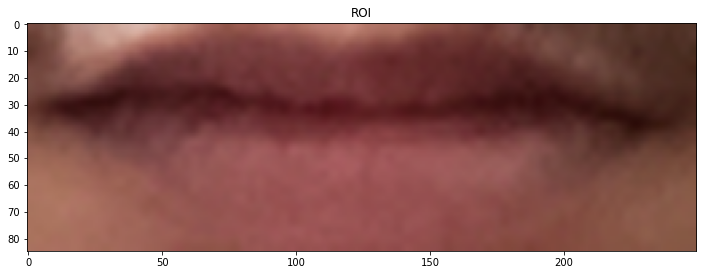

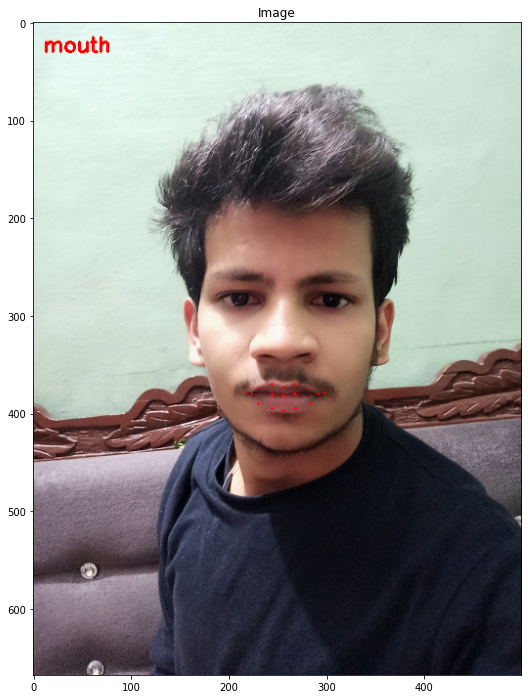

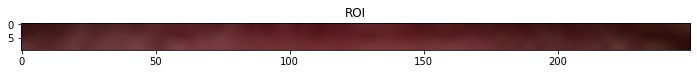

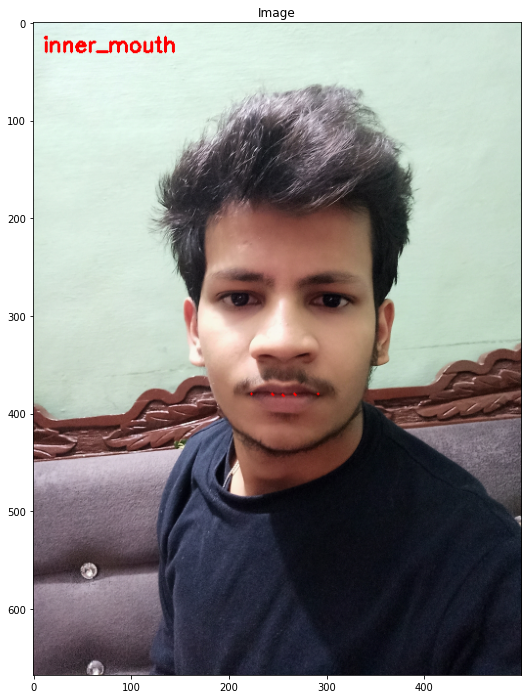

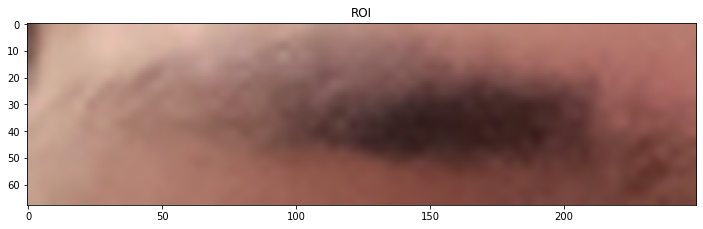

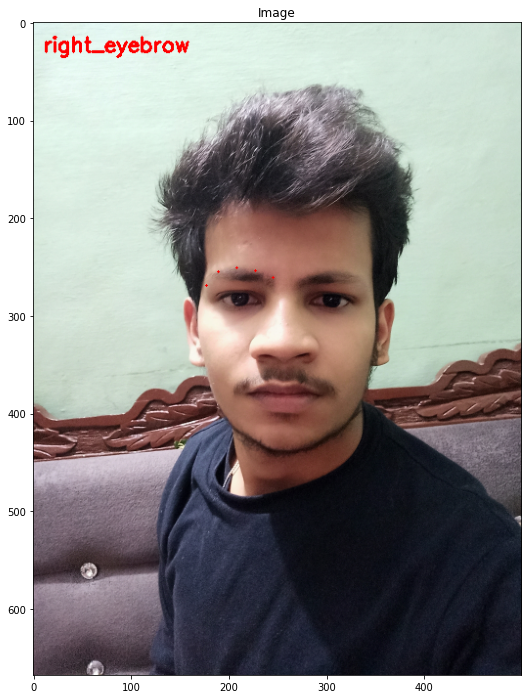

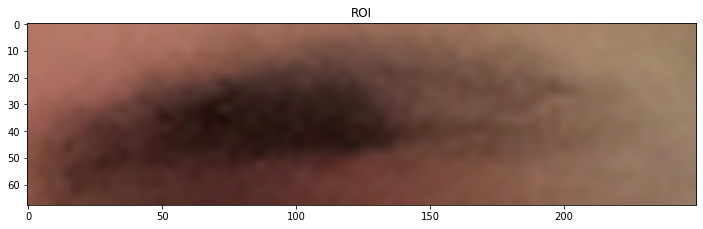

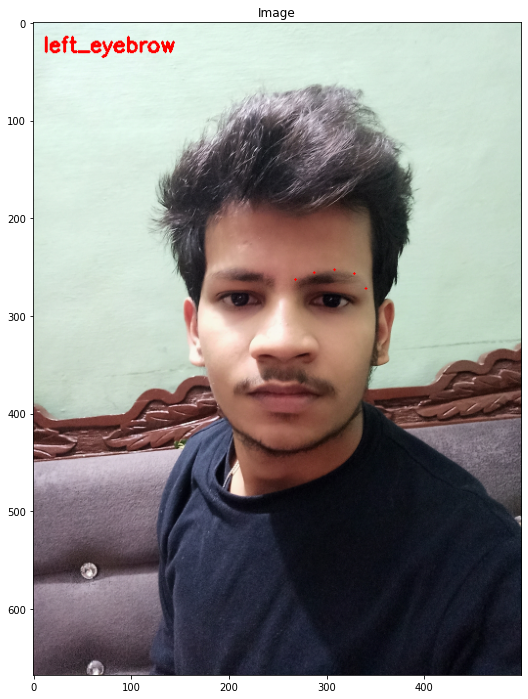

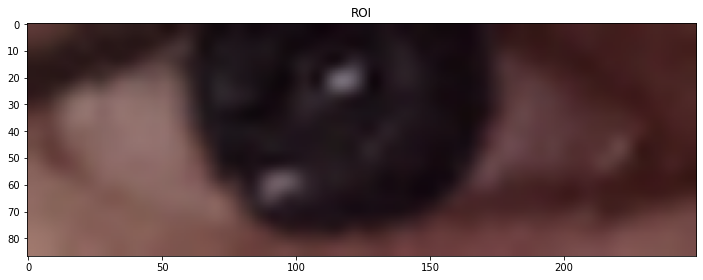

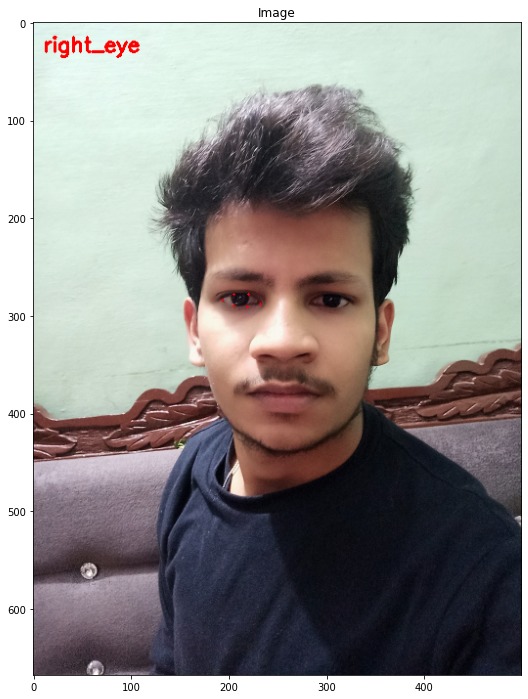

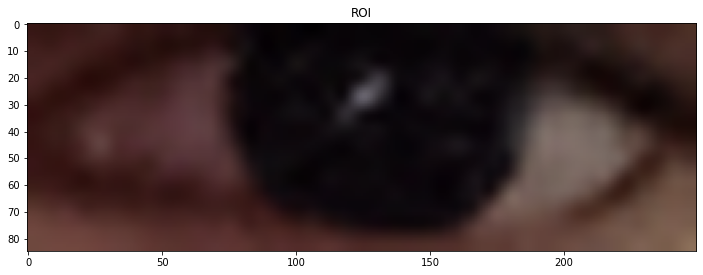

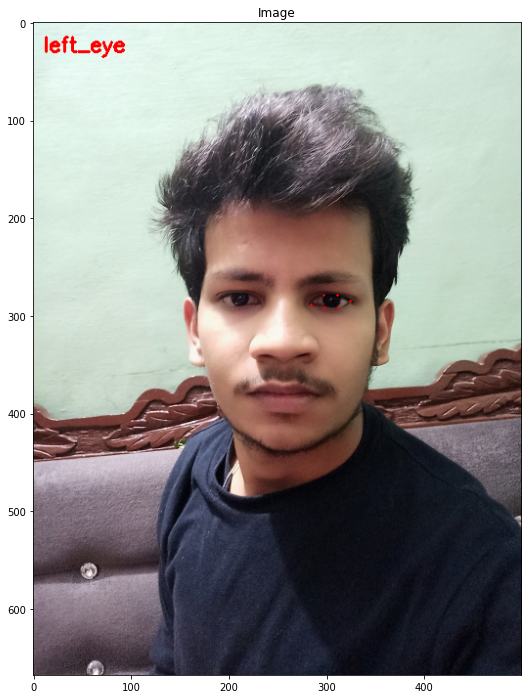

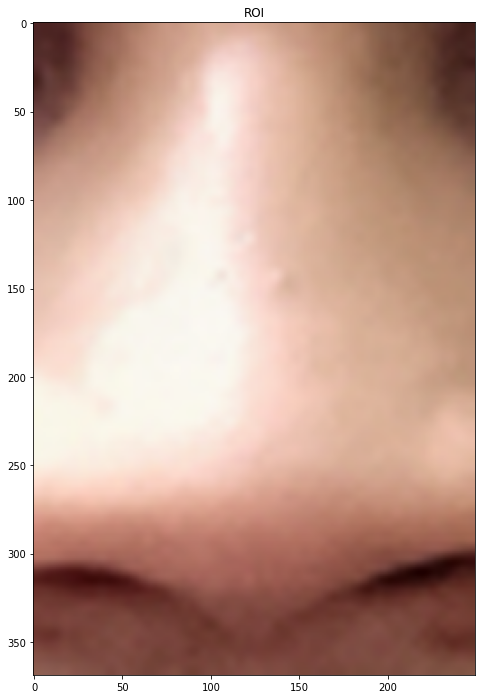

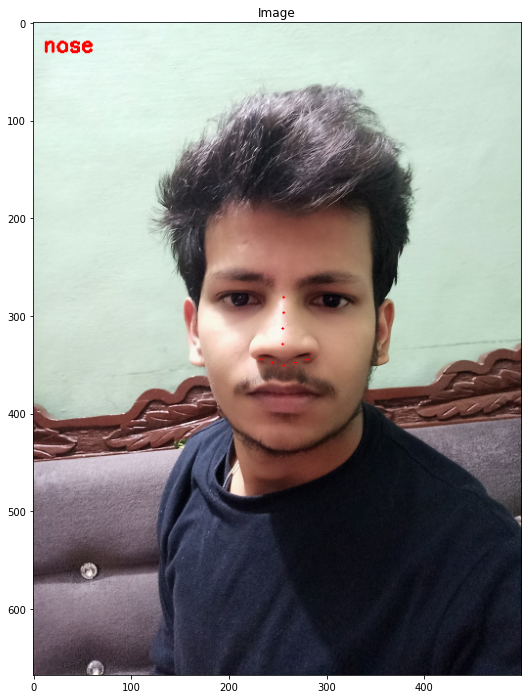

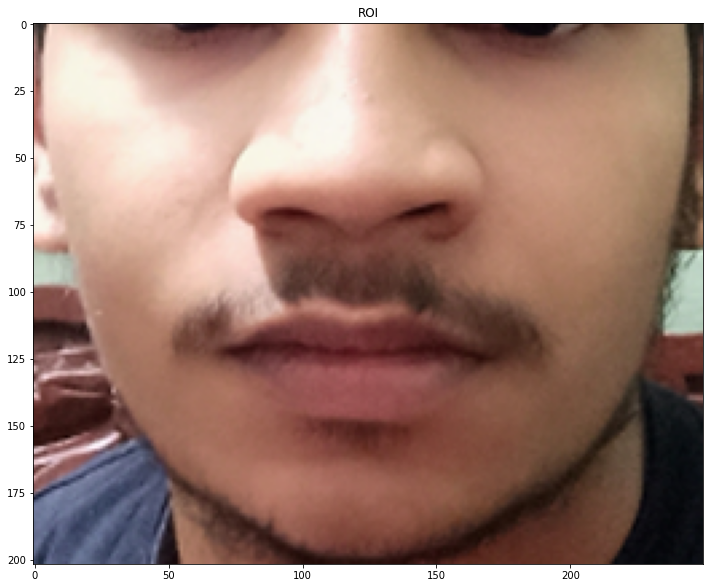

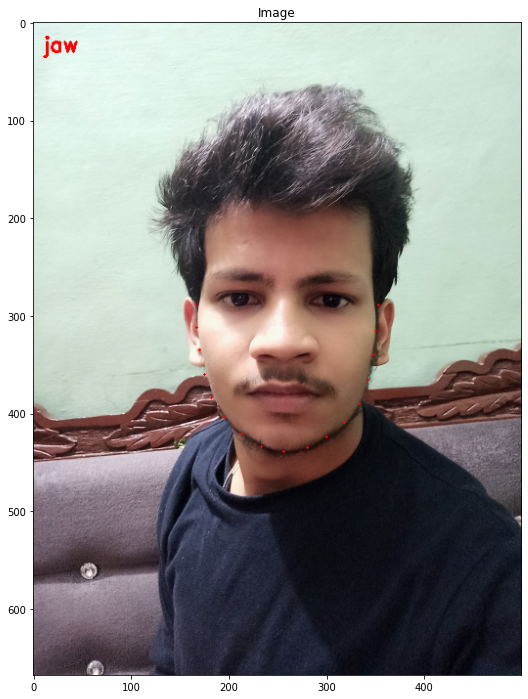

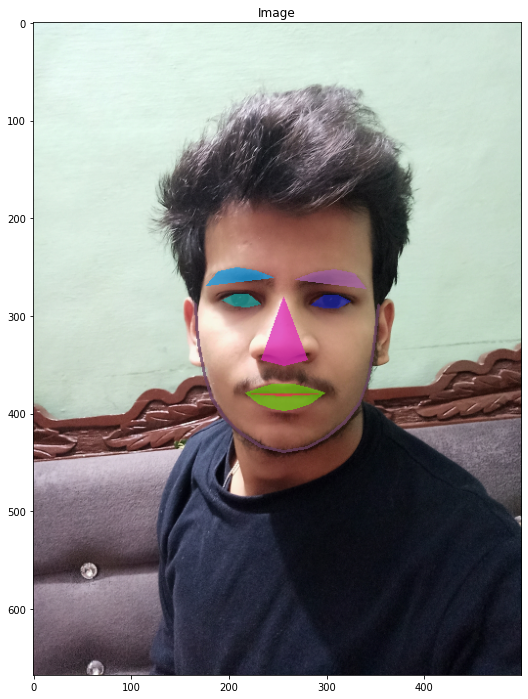

In [8]:
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the landmark (x, y)-coordinates to a NumPy array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)
	
    # loop over the face parts individually
	for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
		
        # clone the original image so we can draw on it, then
		# display the name of the face part on the image
		clone = image.copy()
		cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
			0.7, (0, 0, 255), 2)
		
        # loop over the subset of facial landmarks, drawing the
		# specific face part
		for (x, y) in shape[i:j]:
			cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)
   
        # extract the ROI of the face region as a separate image
		(x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
		roi = image[y:y + h, x:x + w]
		roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
		
        # show the particular face part
		plt_imshow("ROI", roi)
		plt_imshow("Image", clone)
	
    # visualize all facial landmarks with a transparent overlay
	output = face_utils.visualize_facial_landmarks(image, shape, colors=colors)
	plt_imshow("Image", output)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Detect eyes, nose, lips, and jaw with dlib, OpenCV, and Python*](http://pyimagesearch.com/2017/04/10/detect-eyes-nose-lips-jaw-dlib-opencv-python/) blog post published on 2017-04-10.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```